Perform Sentiment Analysis in the network graph using RNN. # 

In [23]:
# 1. Import Libraries
import networkx as nx
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import numpy as np

In [24]:
# 2. Create small training data
texts = [
    "I love this movie", "What an amazing performance",
    "Fantastic visuals and story", "I hated this movie", "Terrible experience", "Worst acting ever"
]
labels = [1, 1, 1, 0, 0, 0]  # 1=Positive, 0=Negative

In [25]:
# 3. Tokenize and pad
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X_train = pad_sequences(sequences, maxlen=10)

In [26]:
# 4. Build small RNN
model = Sequential([
    Embedding(1000, 16, input_length=10),
    SimpleRNN(16),
    Dense(1, activation='sigmoid')
])

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, np.array(labels), epochs=15, batch_size=2)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3125 - loss: 0.7478      
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3125 - loss: 0.7087     
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8333 - loss: 0.6813 
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5833 - loss: 0.6807 
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7708 - loss: 0.6588 
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6458 - loss: 0.6620 
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.6317 
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7292 - loss: 0.6535 
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9167 - loss: 0.6170 
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.6150 
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5864 
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 

In [28]:
# 5. Create Graph with New Texts
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (1,3), (2,4)])

In [29]:
node_texts = {
    0: "I really enjoyed the movie",
    1: "The movie was very bad and boring",
    2: "What an amazing experience",
    3: "Terrible storyline and poor acting",
    4: "Fantastic visuals and acting"
}

In [30]:
# 6. Tokenize node texts
node_sequences = tokenizer.texts_to_sequences(node_texts.values())
X_nodes = pad_sequences(node_sequences, maxlen=10)

In [31]:
# 7. Predict sentiments
predictions = model.predict(X_nodes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [32]:
# 8. Color nodes
node_colors = ['green' if p > 0.5 else 'red' for p in predictions]

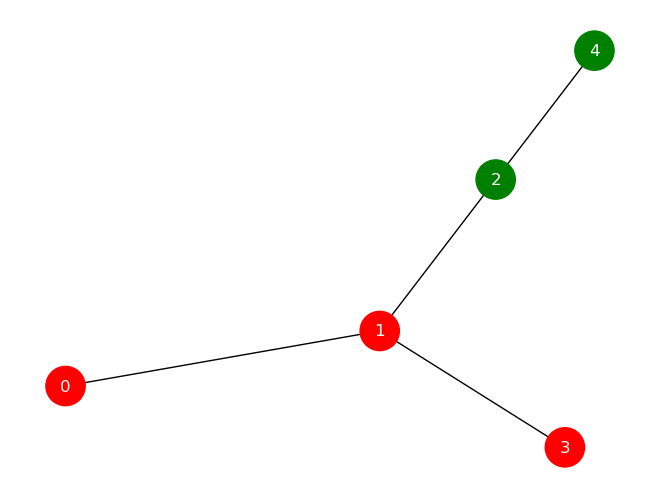

In [33]:

# 9. Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_color='white')
plt.show()